# Weiteres zu Matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Die folgende Zeile erlaubt Interaktionen wie Zoom, Drehungen etc.
# Wenn eine Fehlermeldung auftritt, ist wahrscheinlich ipympl nicht installiert.
# Anaconda:
# > conda install -c conda-forge ipympl
# PyPi:
# > pip install ipympl
#
# Wenn es nicht funktioniert: Ersetze die Zeile durch %matplotlib inline.
# Dann verzichtet man allerdings (zunächst) auf Interaktionen. Lösung: jupyter widgets
%matplotlib widget

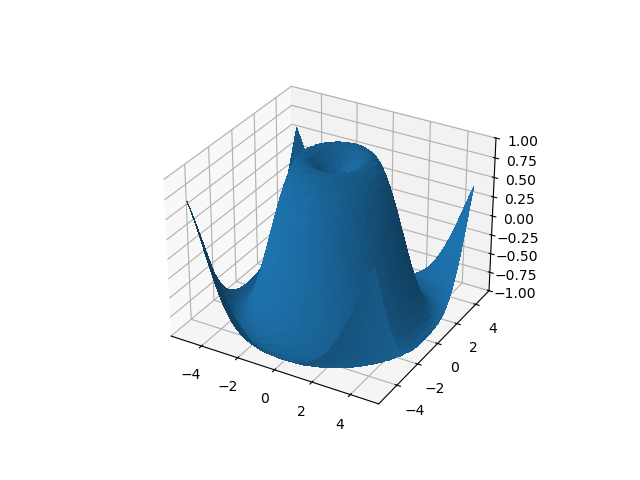

In [2]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure(0)
fig.clear()
ax = fig.add_subplot(1, 1, 1, projection='3d')

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1, 1)

plt.show()

/var/folders/dv/w1w940x57rj_6l3skgv63gqc0000gn/T/ipykernel_40886/3378492971.py:17: UserWarning: The figure layout has changed to tight
  fig1.tight_layout()


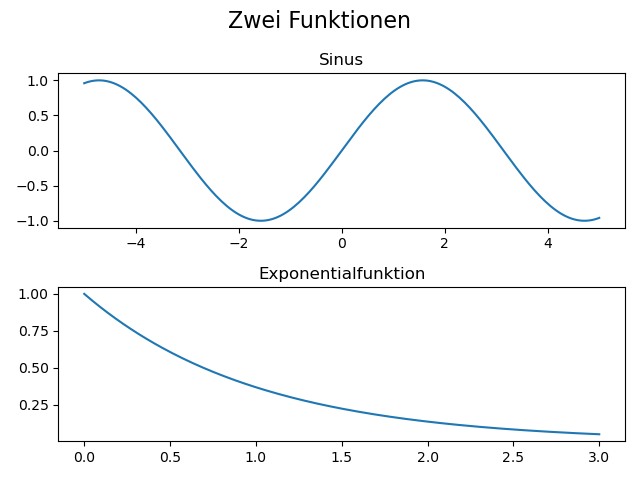

In [3]:
# Mehrere Plots
fig1 = plt.figure(1, constrained_layout=True)
fig1.clear()
ax = fig1.subplots(2, 1) # Figur mit 2 Zeilen, 1 Spalte

ax[0].set_title("Sinus")
x = np.linspace(-5, 5, 200)
y = np.sin(x)
ax[0].plot(x, y)

x = np.linspace(0, 3, 200)
y = np.exp(-x)
ax[1].plot(x, y)
ax[1].set_title("Exponentialfunktion")

fig1.suptitle("Zwei Funktionen", fontsize=16)
fig1.tight_layout()

# Speichern als png- oder pdf-Datei
plt.savefig("fig1.png")
plt.savefig("fig1.pdf")

plt.show()

## Teilen von Achsen

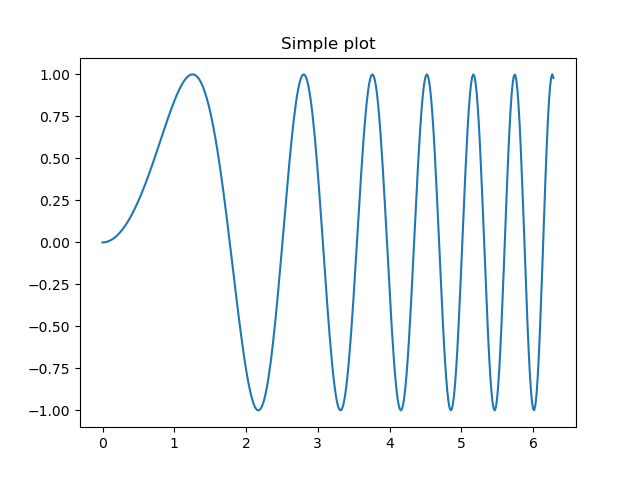

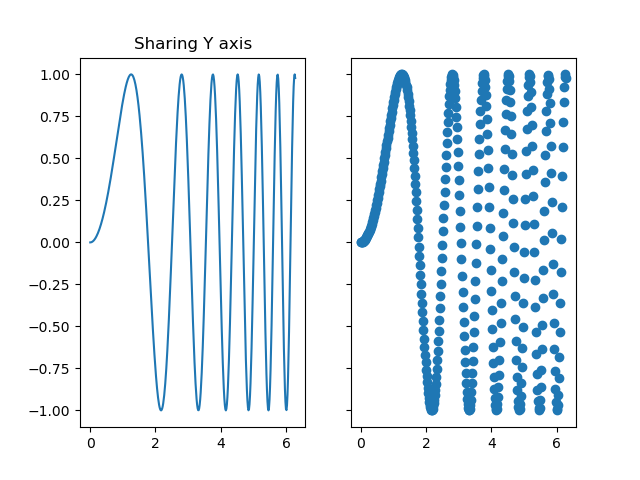

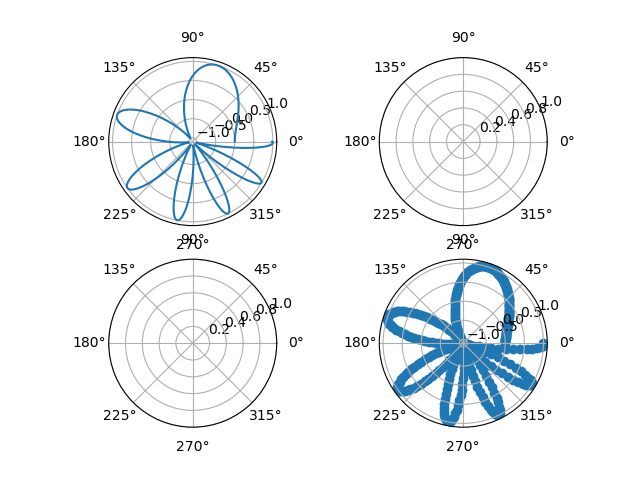

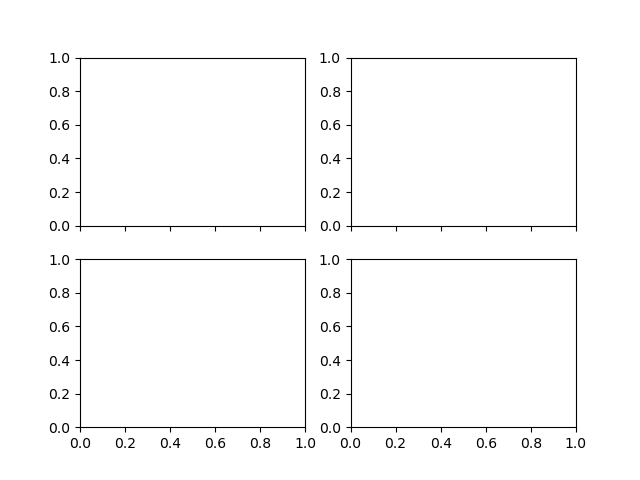

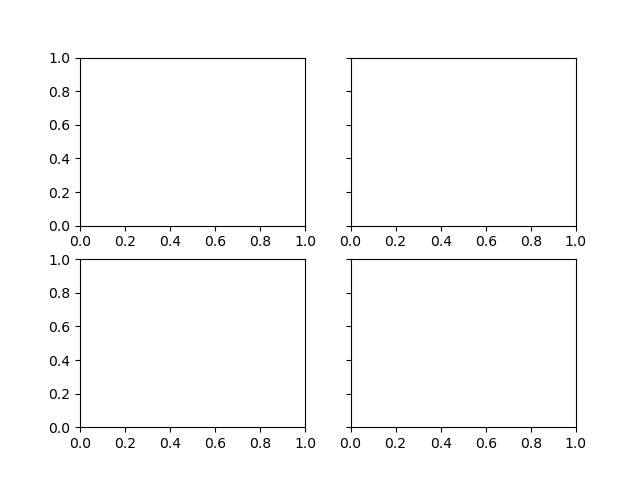

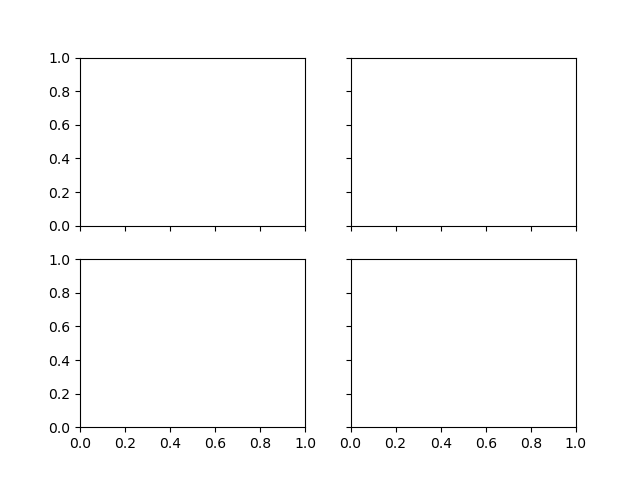

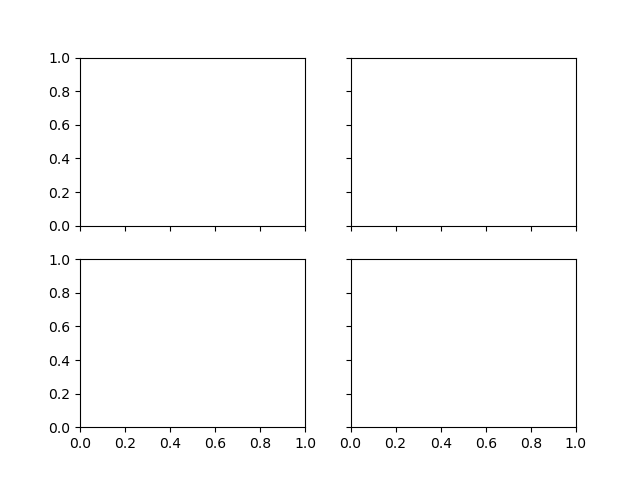

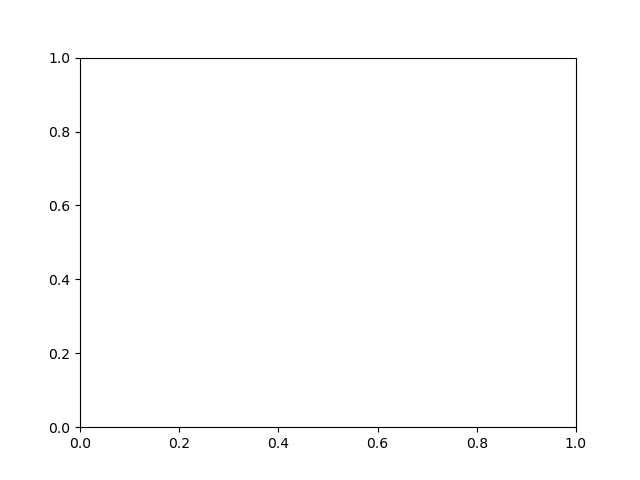

In [4]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Creates figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax=plt.subplots(num=10, clear=True)

In [5]:
plt.close('all') # Alle Figures schließen

## Seitenverhältnisse
engl.: *aspect ratio*.

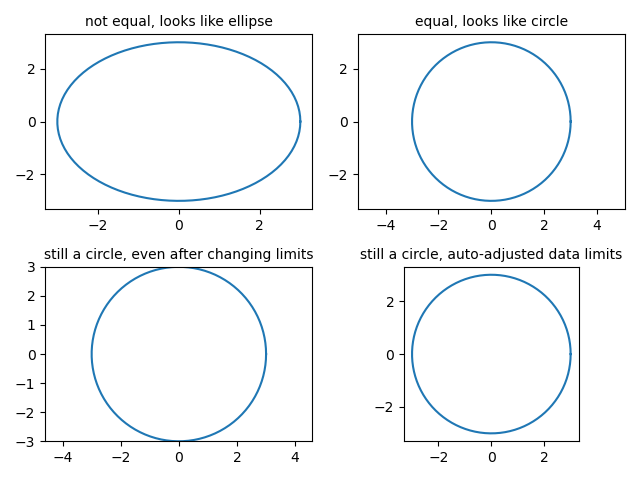

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot circle of radius 3.

an = np.linspace(0, 2 * np.pi, 100)
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 0].set_title('not equal, looks like ellipse', fontsize=10)

axs[0, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[0, 1].axis('equal')
axs[0, 1].set_title('equal, looks like circle', fontsize=10)

axs[1, 0].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 0].axis('equal')
axs[1, 0].set(xlim=(-3, 3), ylim=(-3, 3))
axs[1, 0].set_title('still a circle, even after changing limits', fontsize=10)

axs[1, 1].plot(3 * np.cos(an), 3 * np.sin(an))
axs[1, 1].set_aspect('equal', 'box')
axs[1, 1].set_title('still a circle, auto-adjusted data limits', fontsize=10)

fig.tight_layout()

plt.show()

## Interaktionen

### Slider

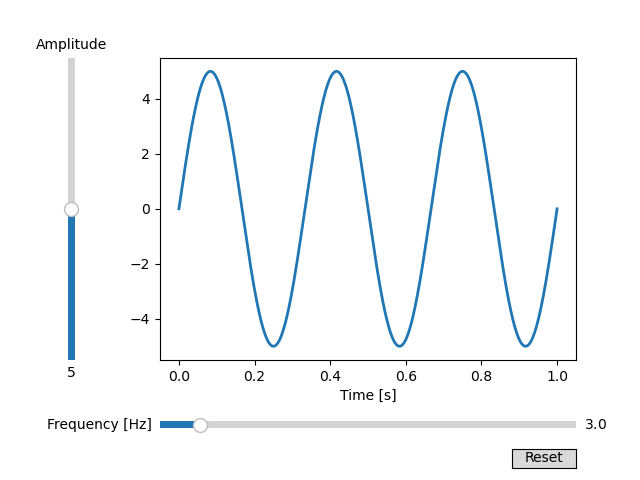

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

from matplotlib.widgets import Button, Slider

# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()